<a href="https://colab.research.google.com/github/Mladen85/GoogleColab/blob/0004_ML_LinearRegression/MachineLearning_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression**
Example how to implement Linear Regression algorithm in Python using Google Colab sample data.<br/>
Since sample data is already copied in GoogleColab_DataSetExample project, files will be used from this folder.

For tutorial video check [YouTube](https://youtu.be/ltXSoduiVwY).

##**Mount Google Drive**

In [30]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


##**Copy data sample from Google Drive to Colab working dir**

In [31]:
!cp gdrive/MyDrive/Colab/GoogleColab_DataSetExample/anscombe.json .

##**Import needed libraries for KNN**
`numpy` is imported for math operation on arrays.

`pandas` is imported to load data from .json or .csv file.

`sklearn datasets` is imported to import dataset for testing.

`train_test_split` is imported for randomly split data for training and testing.

`matplotlib` is imported to show graphs.

In [32]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap

##**Load dataset for training**
As example [Regression](https://www.educative.io/answers/how-to-generate-datasets-for-regression-problems) dataset can be loaded from `sklearn.datasets`.

In [33]:
X_reg, y_reg = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
print(f"X_reg.shape: {X_reg.shape}")
print(f"y_reg.shape: {y_reg.shape}")
#print(f"X_reg:\n{X_reg}")
#print(f"y_reg:\n{y_reg}")
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=1234)
print(f"X_reg_train.shape: {X_reg_train.shape}")
print(f"y_reg_train.shape: {y_reg_train.shape}")
print(f"X_reg_test.shape: {X_reg_test.shape}")
print(f"y_reg_test.shape: {y_reg_test.shape}")
#print(f"X_reg_train:\n{X_reg_train}")
#print(f"y_reg_train:\n{y_reg_train}")

X_reg.shape: (100, 1)
y_reg.shape: (100,)
X_reg_train.shape: (80, 1)
y_reg_train.shape: (80,)
X_reg_test.shape: (20, 1)
y_reg_test.shape: (20,)


For this project Google Colab sample data from `anscombe.json` will be used.

"X" column from dataframe is first converted to numpy array, and then added another dimension by creating `np.array([])` with argument passed previous numpy array. This is done in order to create general `LinearRegression` class. `LinearRegresion` class calculates weights and bias for every dimension.

As backup, here is saved code how I tried to convert data from dataframe to numpy array:
```
df_pandas = pd.read_json("anscombe.json")
dat1, dat2 = df_pandas["X"], df_pandas["Y"]
#dat1.values, dat2.values
print(len(dat1), len(dat2))
X1 = np.array(dat1)
X2 = np.array(dat2)
#print(X1, '\n', X2)
X = np.concatenate([X1[:,None],X2[:,None]], axis=1)
#print(X)
```

"y" data is converted to 1D numpy array.

In [34]:
df_pandas = pd.read_json("anscombe.json")
#df_pandas["Series"] = df_pandas["Series"].astype("category")
#print(df_pandas)
#X = df_pandas[['X','Y']].to_numpy()
#X = np.array([df_pandas['X'].to_numpy()]).T
#y = df_pandas['Y'].to_numpy()
df_pandas_I = df_pandas[df_pandas["Series"] == "III"]
X = np.array([df_pandas_I['X'].to_numpy()]).T
y = df_pandas_I['Y'].to_numpy()
y[2] = 8.5
#print(type(y))
#y[y == 'I'] = int(0)
#y[y == 'II'] = int(1)
#y[y == 'III'] = int(2)
#y[y == 'IV'] = int(3)
#df_pandas.info()
#print(type(X))
#print(type(y))
print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")
print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

X.shape: (11, 1)
y.shape: (11,)
X: 
[[10]
 [ 8]
 [13]
 [ 9]
 [11]
 [14]
 [ 6]
 [ 4]
 [12]
 [ 7]
 [ 5]]

y: 
[7.46 6.77 8.5  7.11 7.81 8.84 6.08 5.39 8.15 6.42 5.73]



##**Split data and target to train and test data**
`train_test_split` function is used to split data (randomly) to train and target data.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
#print(X_train, X_test, y_train, y_test)
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")
#print(f"X_train: \n{X_train}\n")
#print(f"y_train: \n{y_train}\n")
#print(f"X_test: \n{X_test}\n")
#print(f"y_test: \n{y_test}\n")


X_train.shape: (8, 1)
y_train.shape: (8,)
X_test.shape: (3, 1)
y_test.shape: (3,)


##**Plot data**
###**Plot all data**

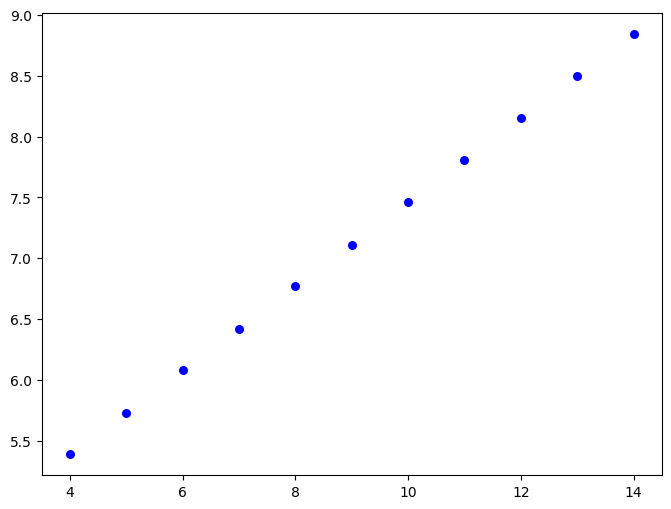

In [36]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], y, color='b', marker='o', s=30)
plt.show()

###**Plot Train and Target data in subplots plots**

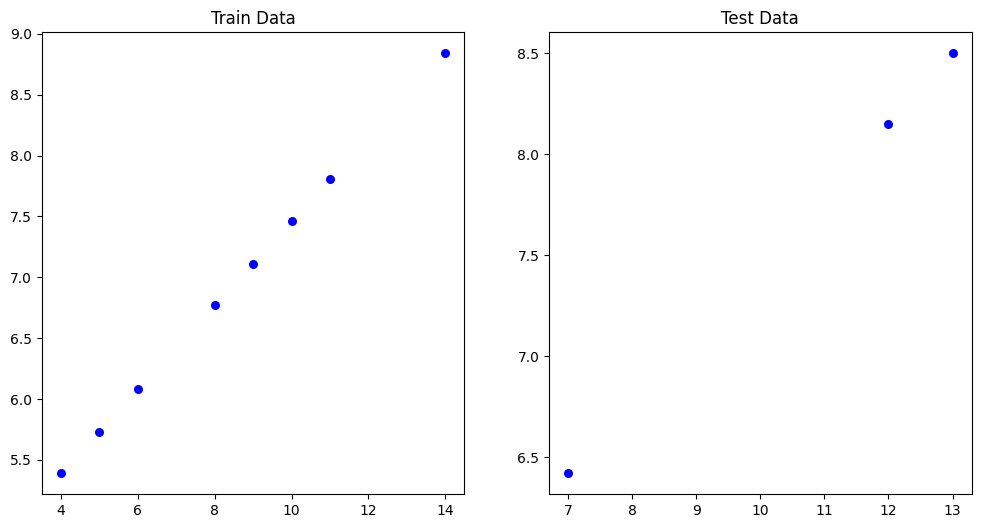

In [37]:
fig = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Data")
plt.scatter(X_train[:,0], y_train, color='b', marker='o', s=30)
plt.subplot(1,2,2)
plt.title("Test Data")
plt.scatter(X_test[:,0], y_test, color='b', marker='o', s=30)
plt.show()


##**Linear Regression class**
LinearRegresion class.

**Note:**

Shape - 

Transponse - 

In [38]:
class LinearRegresion:
  def __init__(self, lr = 0.001, n_iter = 1000):
    self.lr = lr
    self.n_iter = n_iter
    self.weight = None
    self.bias = None

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weight = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iter):
      y_pred = np.dot(X, self.weight) + self.bias

      # X have to be transponded to match y dimensions for dot product
      dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
      db = (1/n_samples) * np.sum(y_pred - y)

      self.weight = self.weight - self.lr * dw
      self.bias = self.bias - self.lr * db
  

  def predict(self, X):
    y_pred = np.dot(X, self.weight) + self.bias
    return y_pred


##**Run Linear Regression algorithm**

Create Classifier and run Linear Regression algorithm.



In [109]:
reg = LinearRegresion(lr=0.009, n_iter=50)
#print(f"type(X): {type(X)}")
#print(X.shape)
#print(X)
#print(f"type(X_train): {type(X_train)}")
#print(X_train.shape)
#print(X_train)
#print(f"type(X_reg): {type(X_reg)}")
#print(X_reg.shape)
#print(X_reg)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

##**Calculate Error**
Mean square root (MSE) will be used.

In [110]:
def mse(y_test, predictions):
  return np.mean((y_test - predictions) ** 2)

In [111]:
mse_error = mse(y_test, predictions)
mse_error

1.244690939758905

###**Print test and prediceted data**

In [112]:
print(f"X_test:\n{X_test}")
print(f"y_test:\n{y_test}")
print(f"predictions:\n{predictions}")
#print(f"type of predictions: {type(predictions)}")

X_test:
[[12]
 [13]
 [ 7]]
y_test:
[8.15 8.5  6.42]
predictions:
[9.11812575 9.85405164 5.43849631]


##**Conclusion**


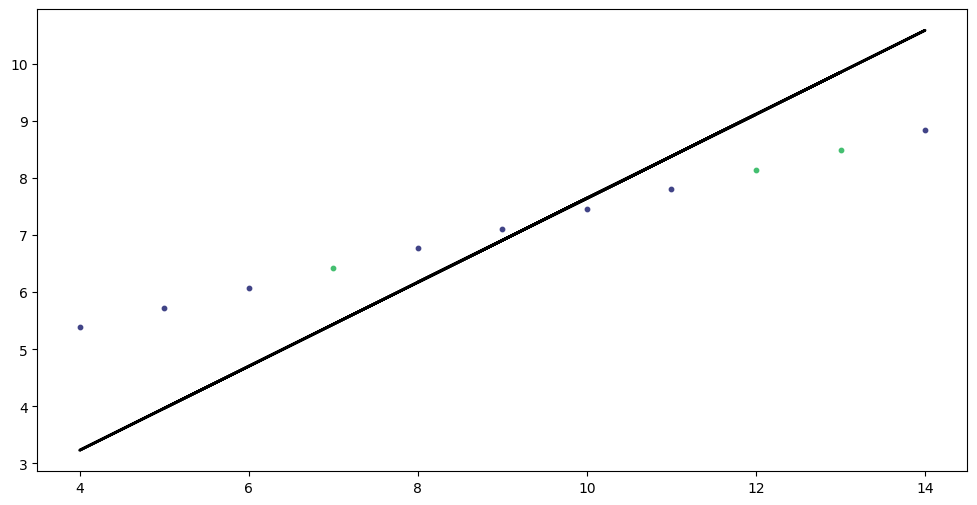

In [113]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(12,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.2), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.7), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

A



y_test:
[8.15 8.5  6.42]
predictions:
[9.11812575 9.85405164 5.43849631]
y_test_sort_index :
[2 0 1]
y_test_sorted:
[6.42 8.15 8.5 ]
predictions_test_sorted:
[5.43849631 9.11812575 9.85405164]
predictions_test_sorted (after manualy setting last point to cat 0):
[5.43849631 9.11812575 9.85405164]


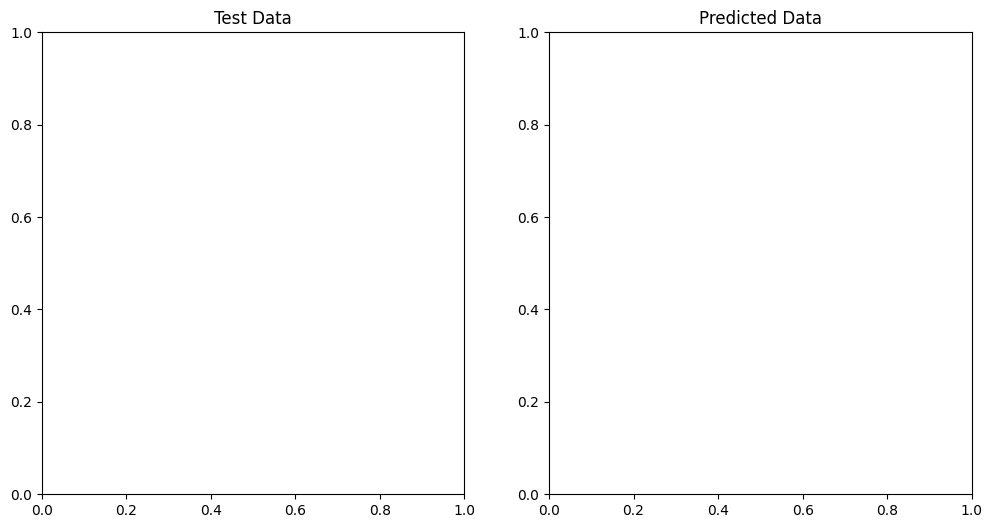

In [114]:
#y_test_sort_index = np.argsort(X_test,0)
y_test_sort_index = X_test[:,0].argsort()
#print(f"y_test_sort_index :\n{y_test_sort_index}")
#print(f"y_test_sort_index1:\n{y_test_sort_index1}")
#X_test_sorted = np.sort(X_test,0)
# Sort X_test only by first column (columns start with 0)
X_test_sorted = X_test[X_test[:,0].argsort()]
#print(X_test_sorted)
y_test_sorted = np.array([y_test[i] for i in y_test_sort_index])
#print(y_test_sort_index)
predictions_test_sorted = np.array([predictions[i] for i in y_test_sort_index])
print(f"y_test:\n{y_test}")
print(f"predictions:\n{predictions}")
print(f"y_test_sort_index :\n{y_test_sort_index}")
print(f"y_test_sorted:\n{y_test_sorted}")
print(f"predictions_test_sorted:\n{predictions_test_sorted}")
#predictions_test_sorted[8] = 0
print(f"predictions_test_sorted (after manualy setting last point to cat 0):\n{predictions_test_sorted}")
#plt.rcParams['figure.figsize'] = (9, 6)
#print(plt.rcParams['figure.figsize']) #output: (6.4, 4.8)
# Set new plot size, from now on all plots will have new size
plt.rcParams['figure.figsize'] = (12, 6)
plt.figure()
# Set subplot within general plot
# plt.sublot(r,c,i) -> r - number of rows, c - number of columns, i - graph index (starts with 1)
plt.subplot(1,2,1)
plt.title("Test Data")
#plt.scatter(X_test_sorted[:,0],X_test_sorted[:,1],c=y_test_sorted,cmap=cmap,edgecolor='k',s=20)
#plt.show()
#print()
#plt.figure()
plt.subplot(1,2,2)
plt.title("Predicted Data")
#plt.scatter(X_test_sorted[:,0],X_test_sorted[:,1],c=predictions_test_sorted,cmap=cmap,edgecolor='k',s=20)
plt.show()

More examples on [Google Colab ploting](https://colab.research.google.com/drive/1wqIUyStkKbUc4MYPvJgIExPOFvC5cUs2#scrollTo=jyIFbvWqNRpR).

In [115]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Series  44 non-null     category
 1   X       44 non-null     int64   
 2   Y       44 non-null     float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 1.1 KB


In [116]:
df_pandas["Series"] = df_pandas["Series"].astype("category")

In [117]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Series  44 non-null     category
 1   X       44 non-null     int64   
 2   Y       44 non-null     float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 1.1 KB


In [118]:
df_pandas.head()

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
